In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob

In [16]:
unifpca = pd.read_csv('../results/daf/chr1_lof_uniformpca_nSIR10000_nSIRreps10.daf',sep='\t')
unifpca["SNV_Type"] = unifpca.apply(lambda row: "Ancestral-Reference" if row["MAF"] == row["Derived_Frequency"] else "Derived-Reference", axis=1)
unifpca

,ITER,CHR,POS,A1,A2,MAF,Derived_Frequency,NOBS,SNV_Type
0,1,1,69745,T,C,0.001110,0.001110,19828,Ancestral-Reference
1,1,1,69843,A,T,0.000000,0.000000,19980,Ancestral-Reference
2,1,1,69849,A,G,0.000818,0.000818,19556,Ancestral-Reference
3,1,1,69869,A,T,0.000050,0.000050,19966,Ancestral-Reference
4,1,1,925920,C,A,0.000000,0.000000,19992,Ancestral-Reference
...,...,...,...,...,...,...,...,...,...
308685,10,1,248917749,T,G,0.000000,0.000000,20000,Ancestral-Reference
308686,10,1,248917774,A,C,0.000000,0.000000,20000,Ancestral-Reference
308687,10,1,248917869,T,G,0.000050,0.000050,20000,Ancestral-Reference
308688,10,1,248918016,T,C,0.000000,0.000000,20000,Ancestral-Reference


In [17]:
unifpca['SNV_Type'].value_counts()

SNV_Type
Ancestral-Reference    308620
Derived-Reference          70
Name: count, dtype: int64

In [18]:
dfpca_lof = pd.read_csv('../results/daf/chr1_lof_uniformpca_nSIR10000_nSIRreps10.daf',sep='\t')
fixed_alleles_lof = dfpca_lof.groupby('POS').filter(lambda group: (group['Derived_Frequency'] == 1.0).all())
fixed_alleles_lof = fixed_alleles_lof['POS'].unique()
# fixed_alleles_lof
dfpca_mis = pd.read_csv('../results/daf/chr1_missense_uniformpca_nSIR10000_nSIRreps10.daf',sep='\t')
fixed_alleles_mis = dfpca_lof.groupby('POS').filter(lambda group: (group['Derived_Frequency'] == 1.0).all())
fixed_alleles_mis = fixed_alleles_mis['POS'].unique()
# fixed_alleles_mis
dfpca_syn = pd.read_csv('../results/daf/chr1_synonymous_uniformpca_nSIR10000_nSIRreps10.daf',sep='\t')
fixed_alleles_syn = dfpca_lof.groupby('POS').filter(lambda group: (group['Derived_Frequency'] == 1.0).all())
fixed_alleles_syn = fixed_alleles_syn['POS'].unique()
# fixed_alleles_syn

70
70
70
70
70
70
70
70
70
70
70
70
70
70
0.8803233197428572
LOF Percentage change (uniformpca vs uniformgeo: -0.8023%
LOF Percentage change (uniformpca vs pca0.0015): -1.3763%
930
930
930
930
930
930
930
930
930
930
930
930
930
930
0.9038627384081721
MIS Percentage change (uniformpca vs uniformgeo: -2.1180%
MIS Percentage change (uniformpca vs pca0.0015): -1.6001%
2160
2160
2160
2160
2160
2160
2160
2160
2160
2160
2159
2160
2159
2160
0.9229884038003705
SYN Percentage change (uniformpca vs uniformgeo: -2.3897%
SYN Percentage change (uniformpca vs pca0.0015): -1.7522%


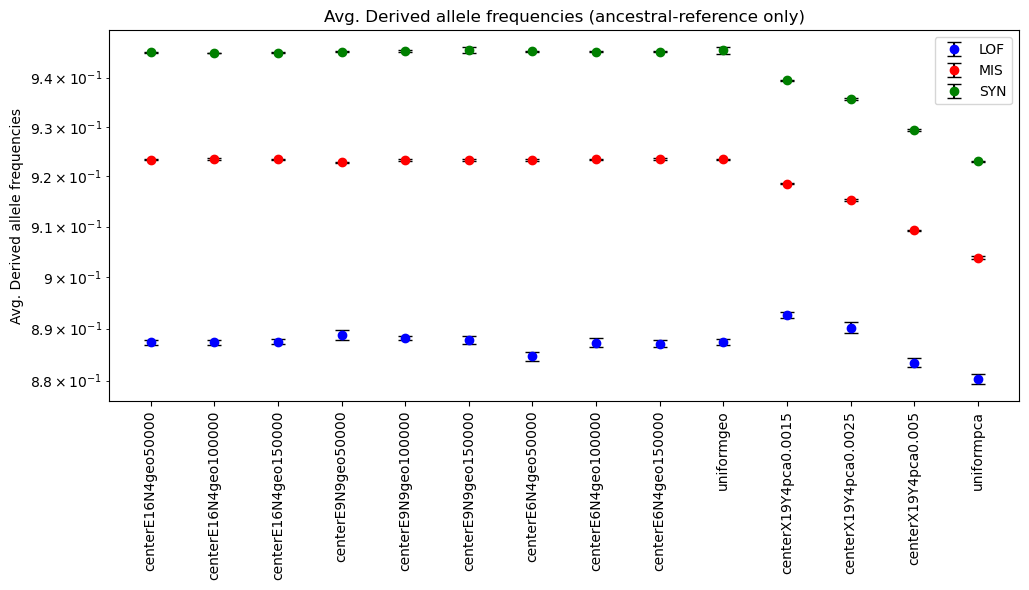

In [21]:
def process_files(pattern, fixed_alleles, label, color):
    files = glob.glob(pattern)
    dfs = {file.split('/')[-1]: pd.read_csv(file, delimiter='\t') for file in files}
    
    mean_freqs = {}
    for file, df in dfs.items():
        scenario = file.split('_')[2]
        df_filtered = df[~df['POS'].isin(fixed_alleles)]
        df_filtered["SNV_Type"] = df_filtered.apply(lambda row: "Ancestral-Reference" if row["MAF"] == row["Derived_Frequency"] else "Derived-Reference", axis=1)
        # df_filtered = df_filtered[df_filtered['SNV_Type']=='Ancestral-Reference']
        df_filtered = df_filtered[df_filtered['SNV_Type']=='Derived-Reference']
        print(len(df_filtered))
        mean_freq = df_filtered.groupby('ITER')['Derived_Frequency'].mean()
        mean_freqs[scenario] = mean_freq
    
    mean_freqs_df = pd.DataFrame(mean_freqs)
    means = mean_freqs_df.mean()
    std_devs = mean_freqs_df.std()

    custom_order = [
        'centerE16N4geo50000', 'centerE16N4geo100000', 'centerE16N4geo150000',
        'centerE9N9geo50000', 'centerE9N9geo100000', 'centerE9N9geo150000',
        'centerE6N4geo50000', 'centerE6N4geo100000', 'centerE6N4geo150000',
        'uniformgeo',
        'centerX19Y4pca0.0015', 'centerX19Y4pca0.0025', 'centerX19Y4pca0.005',
        'uniformpca'
    ]
    
    means = means[custom_order]
    std_devs = std_devs[custom_order]
    print(means.iloc[-1])
    
    percentage_change = ((means.iloc[-1] - means.iloc[9]) / means.iloc[9]) * 100
    print(f"{label} Percentage change (uniformpca vs uniformgeo: {percentage_change:.4f}%")
    # percentage_change = ((means.iloc[-1] - means.iloc[3]) / means.iloc[3]) * 100
    # print(f"{label} Percentage change (uniform vs E9N9 narrow: {percentage_change:.4f}%")
    # percentage_change = ((means.iloc[-1] - means.iloc[6]) / means.iloc[6]) * 100
    # print(f"{label} Percentage change (uniform vs E6N4 narrow: {percentage_change:.4f}%")
    percentage_change = ((means.iloc[-1] - means.iloc[-4]) / means.iloc[-4]) * 100
    print(f"{label} Percentage change (uniformpca vs pca0.0015): {percentage_change:.4f}%")
    # percentage_change = ((means.iloc[2] - means.iloc[0]) / means.iloc[0]) * 100
    # print(f"{label} Percentage change (centerE16N4geo50000 vs centerE16N4geo150000): {percentage_change:.4f}%")
    
    return means, std_devs, label, color

plt.figure(figsize=(10, 6))

# Process each category
lof_means, lof_stds, lof_label, lof_color = process_files('../results/daf/chr1_lof*', fixed_alleles_lof, 'LOF', 'blue')
mis_means, mis_stds, mis_label, mis_color = process_files('../results/daf/chr1_mis*', fixed_alleles_mis, 'MIS', 'red')
syn_means, syn_stds, syn_label, syn_color = process_files('../results/daf/chr1_syn*', fixed_alleles_syn, 'SYN', 'green')

# Plot all data
plt.errorbar(lof_means.index, lof_means, yerr=lof_stds, fmt='o', capsize=5, color=lof_color, ecolor='black', label=lof_label)
plt.errorbar(mis_means.index, mis_means, yerr=mis_stds, fmt='o', capsize=5, color=mis_color, ecolor='black', label=mis_label)
plt.errorbar(syn_means.index, syn_means, yerr=syn_stds, fmt='o', capsize=5, color=syn_color, ecolor='black', label=syn_label)

# Final plot adjustments
plt.xticks(rotation=90)
plt.title("Avg. Derived allele frequencies (ancestral-reference only)")
plt.ylabel("Avg. Derived allele frequencies")
plt.legend()
plt.tight_layout()
plt.yscale('log')
# plt.ylim(1e-4,1e-2)
plt.show()
# plt.savefig('derived_freq_v2.pdf')